### Ideias
- Adicionar probabilidade de alta variação, além dos limites tradicionais
- Integração entre variáveis claramente correlacionadas
- H2 e Metano inversamente proporcionais de modo que a soma de seus valores apresente uma variação de 75-105% (tipicamente 93-98%) do total

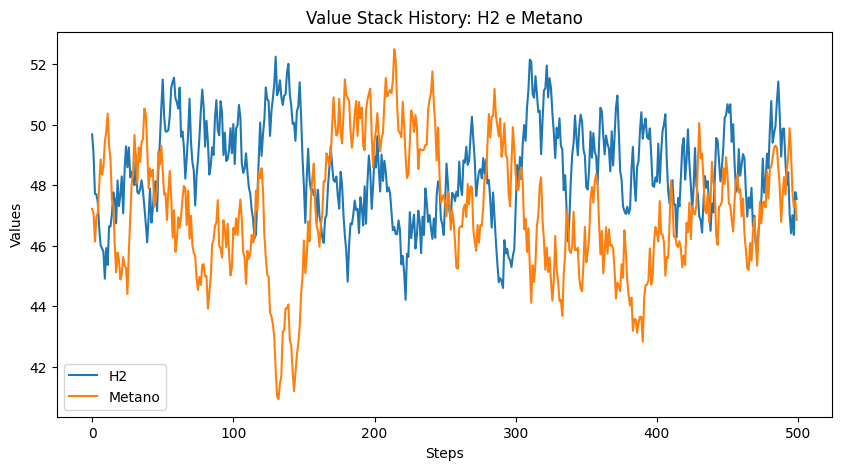

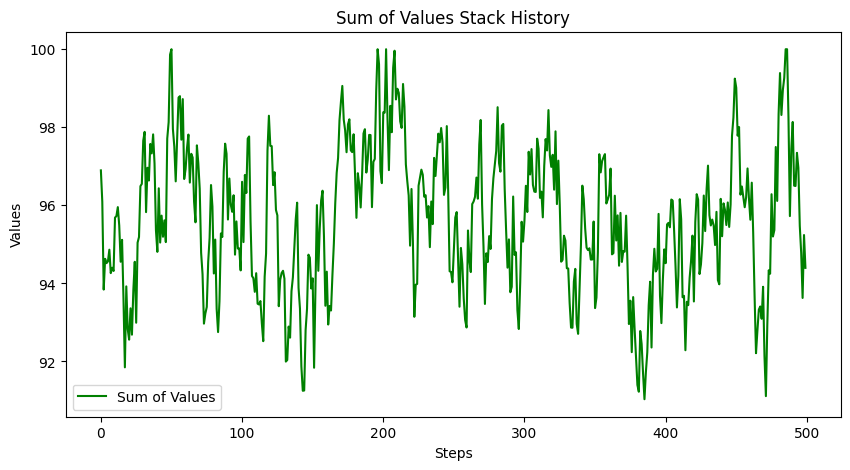

In [2]:
from TurbineSimulator import Standard, BaseOperators

H2 = Standard(lower_bound=30, upper_bound=60, typical_value=48.32, name="H2",
              theta=1.5, typical_bias=0.1)
Metano = Standard(lower_bound=39.24, upper_bound=70, typical_value=47.86, name="Metano",
                  theta=1.5, typical_bias=0.1)

Base = BaseOperators(ope1=H2, ope2=Metano, lower_extra_range=75, upper_extra_range=100,
                     lower_typical_range=93, upper_typical_range=98)

Base.simulate(500)
Base.show_history()
Base.show_sum_history()

# H2.simulate(1000)
# H2.show_history()


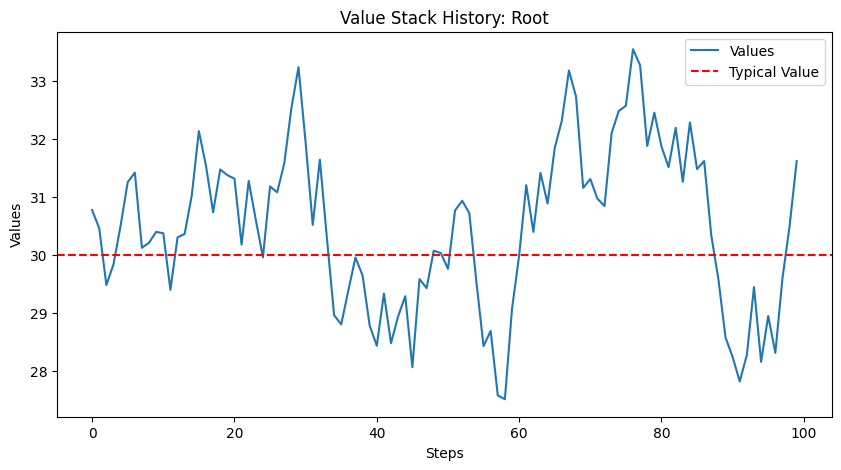

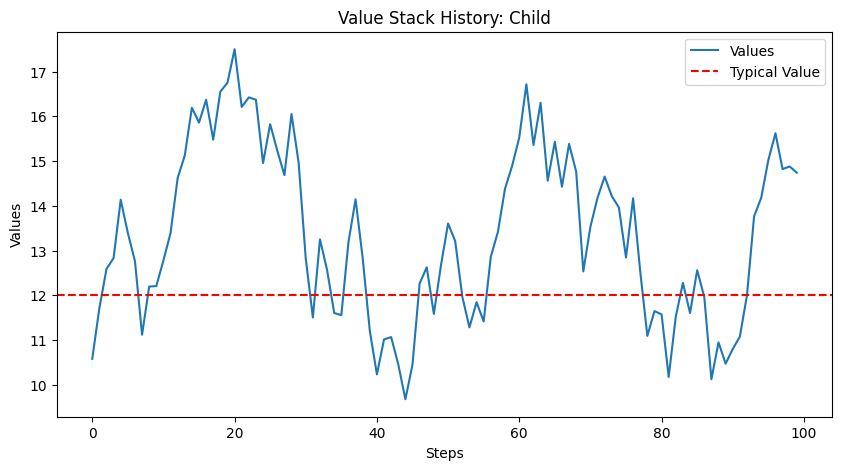

In [7]:
# Define operators
root_op = Standard(lower_bound=10, upper_bound=50, typical_value=30, name="Root")
child_op = Standard(lower_bound=5, upper_bound=20, typical_value=12, name="Child")

# Create graph and nodes
graph = Graph()
root_node = graph.add_node(root_op)
child_node = graph.add_node(child_op)

# Add edge with CorrelacaoUsual
correlation_strategy = CorrelacaoUsual(correlation=0.5)
graph.add_edge(root_node, child_node, strategy=correlation_strategy)

# Simulate and visualize
graph.simulate(steps=100)
root_node.op.show_history()
child_node.op.show_history()

Node H2: Metano 
Node Metano: Propano 
Node Propano: 
Node Enxofre: 


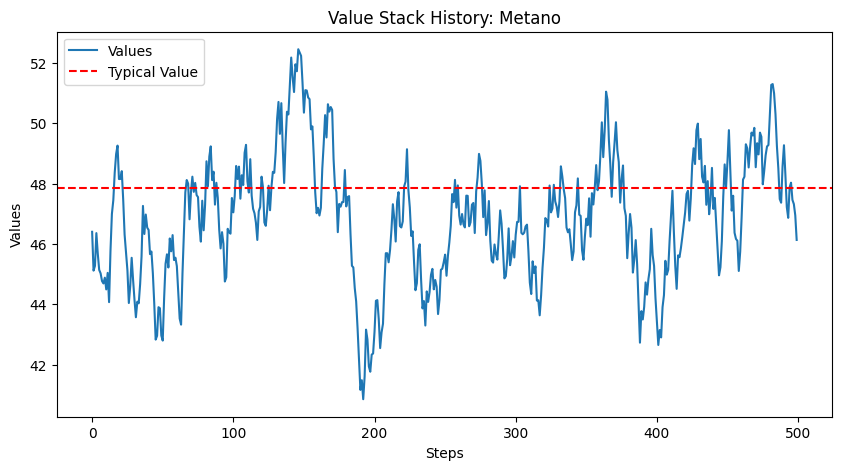

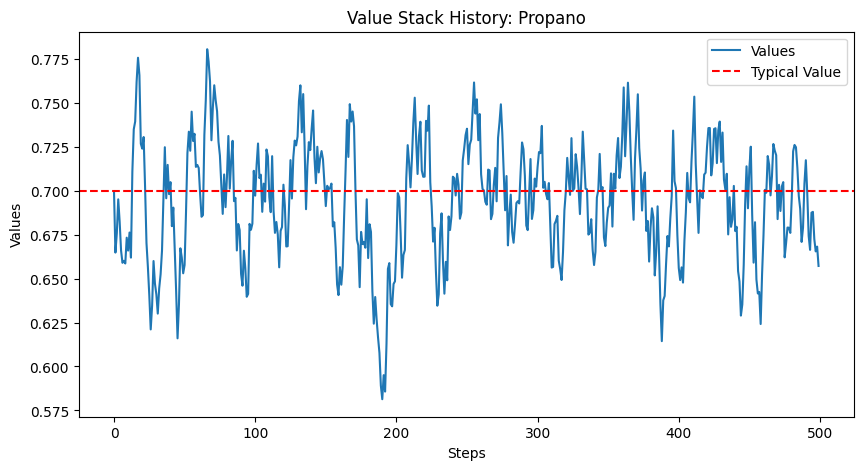

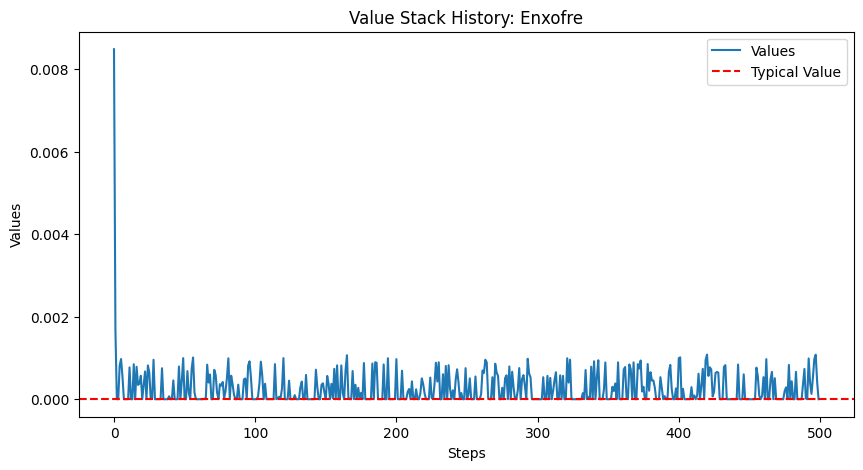

In [11]:
from TurbineSimulator import Standard, Graph, CorrelacaoH2Metano, CorrelacaoUsual

H2      = Standard(lower_bound=30, upper_bound=60, typical_value=48.32, 
                   name="H2", theta=1.5, typical_bias=0.1)
Metano  = Standard(lower_bound=39.24, upper_bound=70, typical_value=47.86, 
                   name="Metano", theta=1.5, typical_bias=0.1)
Propano = Standard(lower_bound=0, upper_bound=0.8, typical_value=0.7,
                    name="Propano", theta=0.01, typical_bias=0.1)
Enxofre = Standard(lower_bound=0, upper_bound=8, typical_value=0,
                    name="Enxofre", theta=0.01, typical_bias=0.9)

relation1 = CorrelacaoH2Metano(limit_lower_bound=75, limit_upper_bound=100,
                              typical_lower_bound=93, typical_upper_bound=98)
relation2 = CorrelacaoUsual(correlation=0.94)
# relation3 = CorrelacaoUsual(correlation=0)

graph = Graph()
node1 = graph.add_node(H2)
node2 = graph.add_node(Metano)
node3 = graph.add_node(Propano)
node4 = graph.add_node(Enxofre)
graph.add_edge(root=node1, child=node2, strategy=relation1)
graph.add_edge(root=node2, child=node3, strategy=relation2)
# graph.add_edge(root=node2, child=node4, strategy=relation3)

graph.display()
graph.simulate(500)
node2.op.show_history()
node3.op.show_history()
node4.op.show_history()

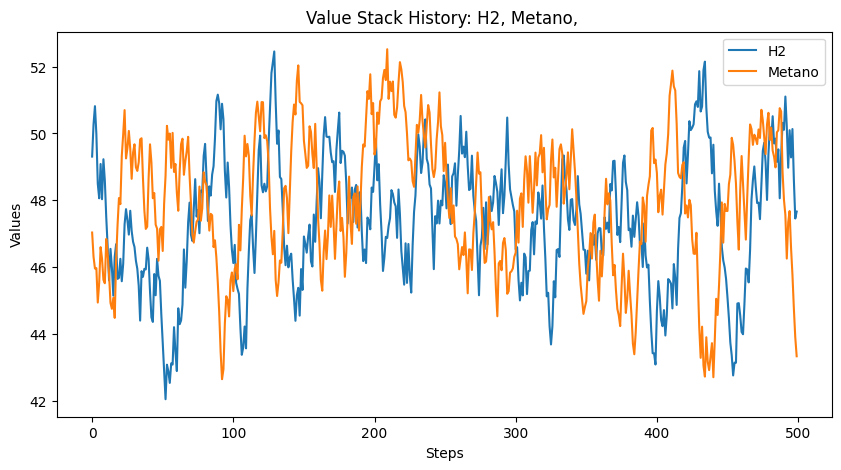

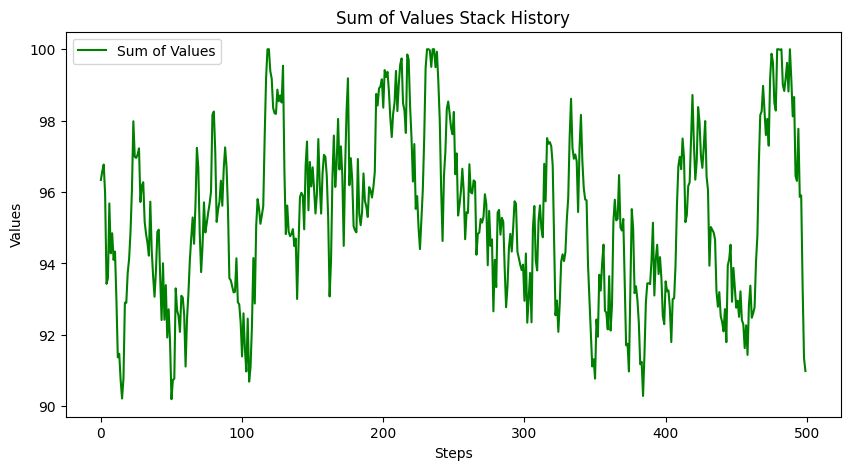

In [6]:
from TurbineSimulator import show_history, show_sum_history

show_history(nodes=[node1, node2])
show_sum_history(node1, node2)